In [52]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.preprocessing import image



In [53]:
# Set up directories for training and testing
train_dir = 'C:/work/Dataset for captcha/train'  # Path to the training folder
test_dir = 'C:/work/Dataset for captcha/test'  # Path to the testing folder

# Image dimensions
img_width, img_height = 64, 64  # Resize images for faster training
batch_size = 32

# Set up ImageDataGenerators for loading and augmenting data
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Random rotations
    width_shift_range=0.2,     # Random shifts
    height_shift_range=0.2,    # Random shifts
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill missing pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for the test set

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),  # Resize images
    batch_size=batch_size,
    class_mode='categorical',             # Assuming you have multiple classes
    shuffle=True
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffle in the test set
)


Found 735 images belonging to 1 classes.
Found 315 images belonging to 1 classes.


In [54]:
# Define your model (ensure this is done correctly)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model - **This step is necessary!**
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Now, you can train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [55]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Decrease the learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])


In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [58]:
batch_size = 32  # or 64


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with L2 regularization and dropout
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=8,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 1.0000 - loss: 3.1222 - val_accuracy: 1.0000 - val_loss: 2.3815
Epoch 2/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.3815 - val_accuracy: 1.0000 - val_loss: 2.3430
Epoch 3/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 1.0000 - loss: 2.1490 - val_accuracy: 1.0000 - val_loss: 1.6393
Epoch 4/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6393 - val_accuracy: 1.0000 - val_loss: 1.6136
Epoch 5/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 1.0000 - loss: 1.4854 - val_accuracy: 1.0000 - val_loss: 1.1514
Epoch 6/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1514 - val_accuracy: 1.0000 - val_loss: 1.1347
Epoch 7/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 1.0000 - loss: 1.0515 - val_accuracy: 1.0000 - val_loss: 0.8353
Epoch 8/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.8353 - val_accuracy: 1.0000 - val_loss:

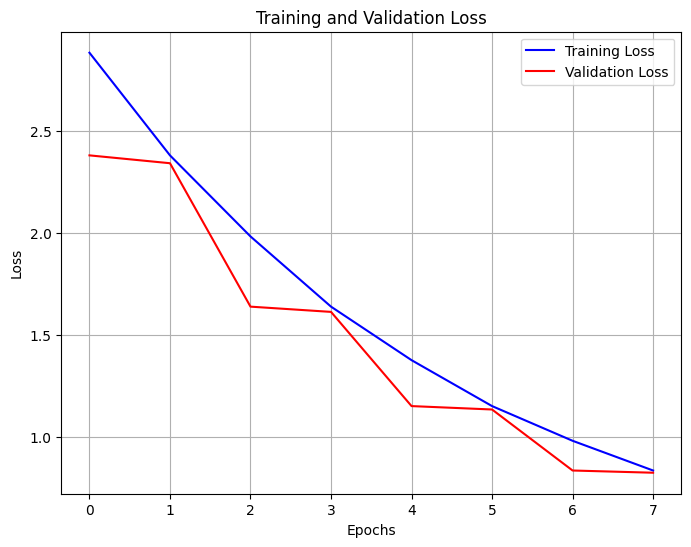

In [60]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned from model.fit()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


